# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

The Excess Readmission Ratio is calculated as the ratio of predicted readmissions to expected readmissions.
- Predicted admissions is the number of 30-day readmission predicted for your hospital on the basis of
your hospital’s performance with its observed case mix and your hospital’s estimated effect on
readmissions. This is presented as a rate per 100 discharges by dividing by the number of
eligible discharges.
- Expected readmissions is the number of 30-day readmissions expected for your hospital on the basis
of average hospital performance with your hospital’s case mix and the average hospital effect. 

In [2]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp

from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [4]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']

In [5]:
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)


C:\Users\King Wong\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [6]:
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

In [7]:
clean_hospital_read_df.tail()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
8126,NAPLES COMMUNITY HOSPITAL,100018,FL,READM-30-HIP-KNEE-HRRP,2716,NaN,0.9804,5.2,5.3,141.0,07/01/2010,06/30/2013
6643,COMMUNITY MEDICAL CENTER,310041,NJ,READM-30-COPD-HRRP,2740,NaN,1.0003,22.7,22.7,623.0,07/01/2010,06/30/2013
1892,FLORIDA HOSPITAL,100007,FL,READM-30-HF-HRRP,3570,NaN,1.0896,24.5,22.5,879.0,07/01/2010,06/30/2013
13615,NEW ENGLAND BAPTIST HOSPITAL,220088,MA,READM-30-HIP-KNEE-HRRP,3980,NaN,0.7682,3.7,4.8,142.0,07/01/2010,06/30/2013
13666,HOSPITAL FOR SPECIAL SURGERY,330270,NY,READM-30-HIP-KNEE-HRRP,6793,NaN,0.7379,3.9,5.3,258.0,07/01/2010,06/30/2013


In [8]:
x = list(clean_hospital_read_df['Number of Discharges'][81:-3])
type(x[0])

int

In [9]:
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])
type(y)

list

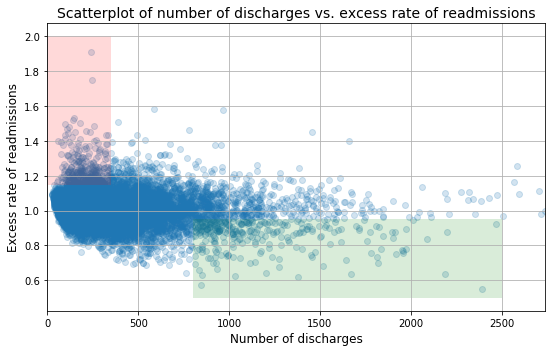

In [10]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function

x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

**ANSWER**

(A). 

I don't completely agree with the following observations made above and would need further proof.
- "Overall, (excess?) rate of readmissions is trending down with increasing number of discharges"
- "There is a significant correlation between hospital capacity (number of discharges) and readmission rates."

Based on linear regression, the best-fit line does have a negatively slow. However, the Pearson Coeff calculated is close to zero and suggests that there isn't a strong correlation between the hospital capacity (number of discharges) and readmission rates. 

(B.1-B.3)

Null hypothesis H_o: Correlation is stronger negatively than the data shown (Pearson Coeff < -0.0931)

Alternative hypothesis H_a: Correlation is not stronger negatively than the data shown

However, the hypothesis test fails to reject the null hypothesis and suggests it is likely that there is a negative correlation --- the larger the number of discharges, the less the excess readmission rates.


(B.4) There is statistical significance found in the hypothesis test. It is likely that there is a negative correlation --- the larger the number of discharges, the less the excess readmission rates.

However, based on the bootstrap sampling of 10000, the Pearson Coefficients range from 0 to -0.14, close to zero and very low correlation. There is not enough practical significance found to justify taking actions such as stated in conclusion and recommendations.


(B.5) The advantage of the scatterplot is it is clear how the points are distributed. The disadvantage is that since there are so many data points in the lower bound of the x-axis, the data is all "clumped" together and harder to see.

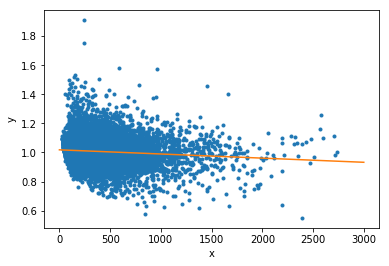

In [11]:
# Perform linear regression: a, b
m, n = np.polyfit(x,y,1)

# Generate theoretical x and y data: x_theor, y_theor
x_theor = np.array([0, 3000])
y_theor = m * x_theor + n

# Plot the Anscombe data and theoretical line
plt.plot(x,y,marker='.',linestyle='none')
plt.plot(x_theor,y_theor)

# Label the axes
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()

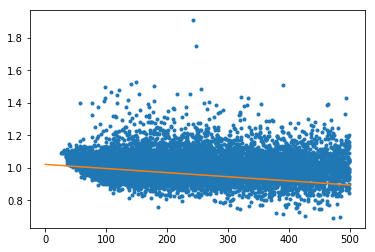

In [12]:
# Plot number of discharges (<500) vs. excess rate of readmissions

a = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges']<500]
b = a[a['Number of Discharges']>0]
c = [i for i in b['Number of Discharges']]
d = list(b['Excess Readmission Ratio'])

# Perform linear regression:
m, n = np.polyfit(c,d,1)

# Generate theoretical x and y data: x_theor, y_theor
c_theor = np.array([0, 500])
d_theor = m * x_theor + n

# Plot the Anscombe data and theoretical line
plt.plot(c,d,marker='.',linestyle='None')
plt.plot(c_theor,d_theor)

# Show the plot
plt.show()

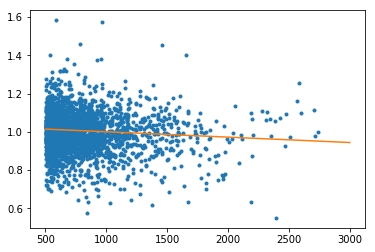

In [13]:
# Plot number of discharges (>500 and <3000) vs. excess rate of readmissions

e = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges']>500]
f = e[e['Number of Discharges']<3000]
g = [i for i in f['Number of Discharges']]
h = list(f['Excess Readmission Ratio'])

# Perform linear regression:
m, n = np.polyfit(g,h,1)

# Generate theoretical x and y data: x_theor, y_theor
g_theor = np.array([500, 3000])
h_theor = m * x_theor + n

# Plot the Anscombe data and theoretical line
plt.plot(g,h,marker='.',linestyle='None')
plt.plot(g_theor,h_theor)

# Show the plot
plt.show()

In [14]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(x,y)

# Compute Pearson correlation coefficient for I. versicolor: r
pr_coff = pearson_r(x,y)

print(f'The covariance of the data is {round(covariance_matrix[1][0],4)}')
print(f'The Pearson correlation of the data is {round(pr_coff,4)}. It is negative and close to 0,')
print("which suggests that there isn't a strong correlation between the two variables" )        

The covariance of the data is -2.5631
The Pearson correlation of the data is -0.0931. It is negative and close to 0,
which suggests that there isn't a strong correlation between the two variables


In [51]:
# Hypothesis test --- Bootstrap approach
# Null hypothesis H_o: Correlation is stronger negatively than the data shown (Pearson Coeff < -0.0931)
# Alternative hypothesis H_a: Correlation is not stronger negatively than the data shown
# Significance level = 0.01

def draw_bs_pairs(x, y, func, size=1):
    """Perform pairs bootstrap for a single statistic."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        
        bs_x = []
        bs_y = []
        bs_inds = np.random.choice(inds,size=len(inds))
        
        for n in bs_inds:
            bs_x.append(x[n])
            bs_y.append(y[n])

        bs_replicates[i] = func(bs_x, bs_y)

    return bs_replicates

perm_replicates = draw_bs_pairs(x,y,pearson_r,10000)

# Compute p-value: p
p = np.sum(perm_replicates < pr_coff)/len(perm_replicates)

print(f'The p-value is {p}, > 0.01. Fail to reject null hypothesis.')

The p-value is 0.5021, > 0.01. Fail to reject null hypothesis.


Text(0,0.5,'Pearson Coefficient')

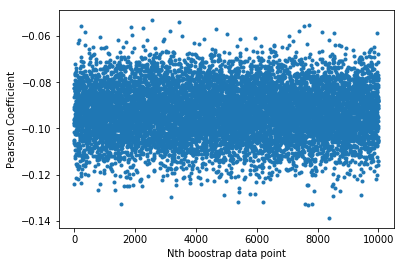

In [76]:
plt.plot(perm_replicates,marker='.',linestyle='None')
plt.xlabel('Nth boostrap data point')
plt.ylabel('Pearson Coefficient')

C:\Users\King Wong\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\King Wong\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


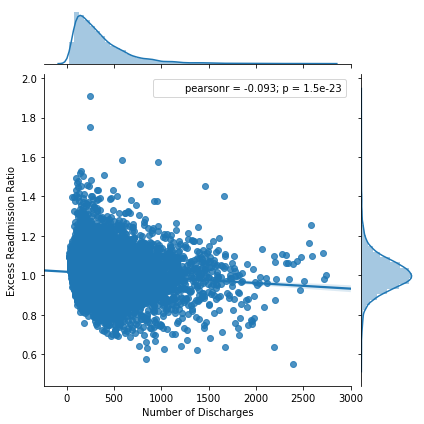

In [52]:
# Generate a joint plot
sns.jointplot(x='Number of Discharges',y='Excess Readmission Ratio',data=clean_hospital_read_df[81:-3],kind='reg')

# Display the plot
plt.show()

C:\Users\King Wong\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\King Wong\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


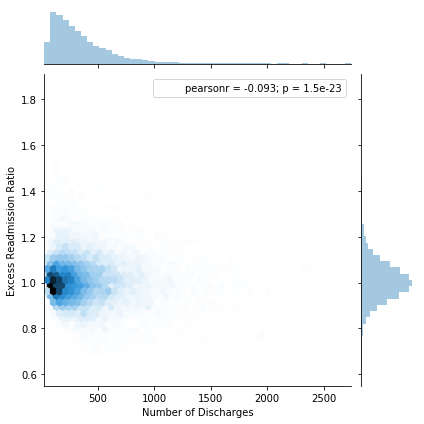

In [53]:
# Generate a joint plot
sns.jointplot(x='Number of Discharges',y='Excess Readmission Ratio',data=clean_hospital_read_df[81:-3],kind='hex')

# Display the plot
plt.show()

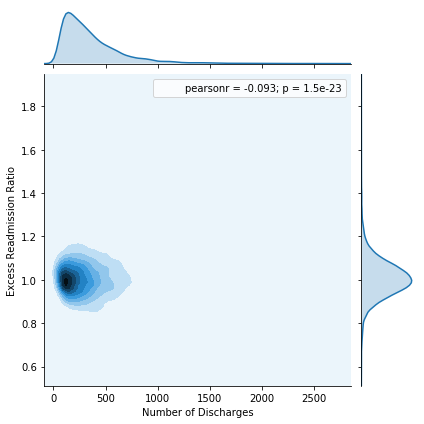

In [55]:
# Generate a joint plot
sns.jointplot(x='Number of Discharges',y='Excess Readmission Ratio',data=clean_hospital_read_df[81:-3],kind='kde')

# Display the plot
plt.show()